In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['figure.figsize'] = 16, 10
matplotlib.rcParams['text.color'] 
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

plt.style.use('fivethirtyeight')

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [2]:
n_classes = 10
x = 0

In [3]:
X = np.transpose(np.loadtxt("Data.txt"))
X = X.transpose()
X = X.astype(int)
X.shape

(2000, 240)

In [4]:
X = X.reshape(2000, 15, 16)

In [5]:
y = np.array([])
y = y.astype(int)

for i in range(2000):
    y = np.append(y, x)
    if(i != 0 and i % 200 == 0):
        x = x + 1
        continue

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

X_train = X_train.reshape(X_train.shape[0], 15, 16, 1)
X_test = X_test.reshape(X_test.shape[0], 15, 16, 1)

In [8]:
model = Sequential()

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(15,16,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 14, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 14, 25)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4550)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               455100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 456,360
Trainable params: 456,360
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
25/25 [==============================] - 2s 73ms/step - loss: 1.3560 - accuracy: 0.5909 - val_loss: 0.2305 - val_accuracy: 0.9375
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 0.2339 - accuracy: 0.9414 - val_loss: 0.1752 - val_accuracy: 0.9600
Epoch 3/10
25/25 [==============================] - 0s 12ms/step - loss: 0.1212 - accuracy: 0.9767 - val_loss: 0.1540 - val_accuracy: 0.9625
Epoch 4/10
25/25 [==============================] - 0s 11ms/step - loss: 0.0626 - accuracy: 0.9873 - val_loss: 0.1293 - val_accuracy: 0.9650
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0475 - accuracy: 0.9915 - val_loss: 0.1306 - val_accuracy: 0.9600
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0218 - accuracy: 0.9950 - val_loss: 0.1312 - val_accuracy: 0.9675
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0092 - accuracy: 0.9994 - val_loss: 0.1354 - val_accuracy: 0.9650
Epoch 8/10
25

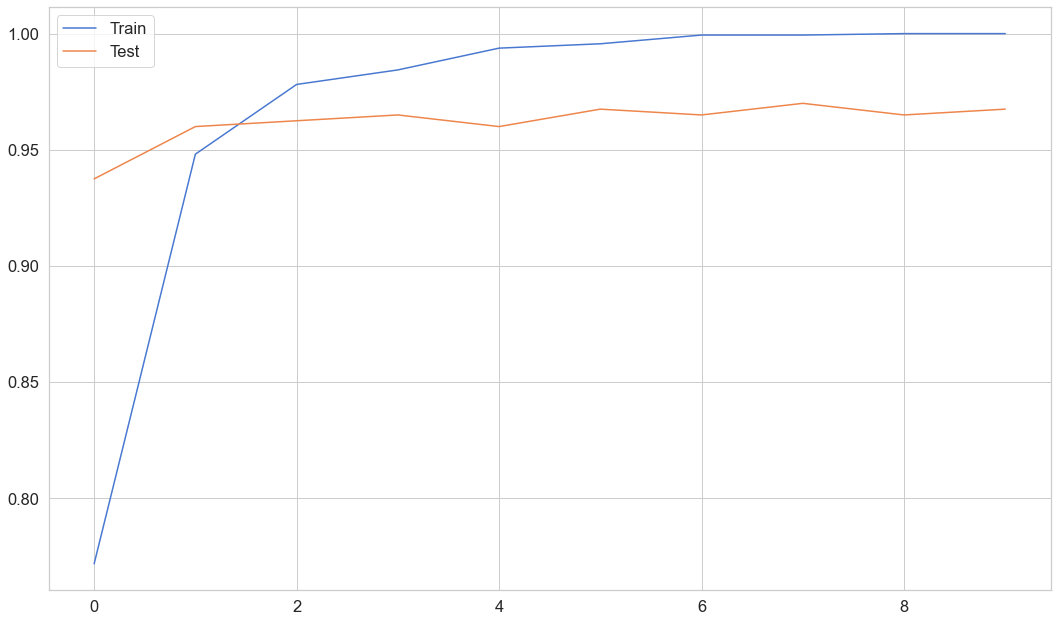

In [11]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test)
predictions = y_pred.argmax(axis=1)

df = pd.DataFrame(data=predictions, columns=["Predictions"])
df2 = pd.DataFrame(data=y_test, columns=["OriginalData"])

In [16]:
pd.crosstab(df.Predictions,df2.OriginalData)

OriginalData,0,1,2,3,4,5,6,7,8,9
Predictions,,,,,,,,,,
0,36,0,0,1,0,0,0,0,0,0
1,0,45,0,2,0,0,0,0,1,1
2,0,0,46,0,0,0,0,0,0,0
3,0,0,0,33,0,2,0,0,0,0
4,0,0,0,0,34,0,1,0,0,0
5,0,0,0,0,0,32,0,0,0,0
6,0,1,0,0,0,0,32,0,0,0
7,0,1,0,0,0,0,0,43,0,0
8,0,0,0,0,0,0,0,1,45,0


# Other code

In [ ]:
#Invert from 'to_categorical'
y_classes = [np.argmax(y, axis=None, out=None) for y in Y_test]

In [ ]:
#More complex CNN
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(15, 16, 1)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

In [ ]:
#Simple NN
model = Sequential()
model.add(Dense(100, input_shape=(240,), activation='relu'))
model.add(Dense(10, activation ='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_test, Y_test))